In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# New section

In [ ]:
data = pd.read_csv("Churn_Modelling (1).csv")

In [ ]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df = data.copy()

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


### Data Cleaning

In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
df['HasCrCard'] = df['HasCrCard'].replace([1], 'YES')
df['HasCrCard'] = df['HasCrCard'].replace([0], 'NO')


In [ ]:
df['IsActiveMember'] = df['IsActiveMember'].replace([1], 'YES')
df['IsActiveMember'] = df['IsActiveMember'].replace([0], 'NO')
df['Exited'] = df['Exited'].replace([1], 'YES')
df['Exited'] = df['Exited'].replace([0], 'NO')


In [ ]:
df.drop('RowNumber',axis=1,inplace=True)

In [ ]:
df.duplicated().sum()

0

# Analysis

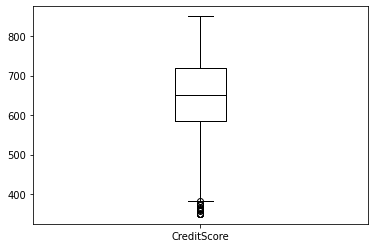

In [ ]:
df.boxplot(column=['CreditScore'], grid=False, color='black')

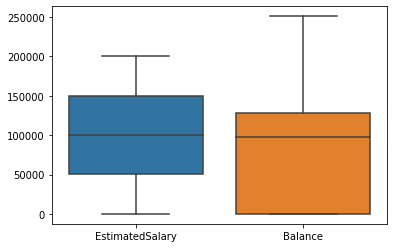

In [ ]:
sns.boxplot(data=df.loc[:, ['EstimatedSalary', 'Balance']])

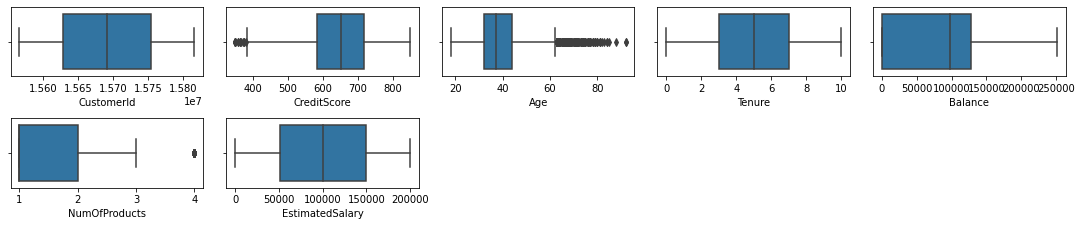

In [ ]:
cols = 5
rows = 6
num_cols = df.select_dtypes(exclude='object').columns
fig = plt.figure(figsize= (15,9))
for i, col in enumerate(num_cols):
        
        ax=fig.add_subplot( rows, cols, i+1)
        
        sns.boxplot(x=df[col], ax=ax)
fig.tight_layout()
plt.show()

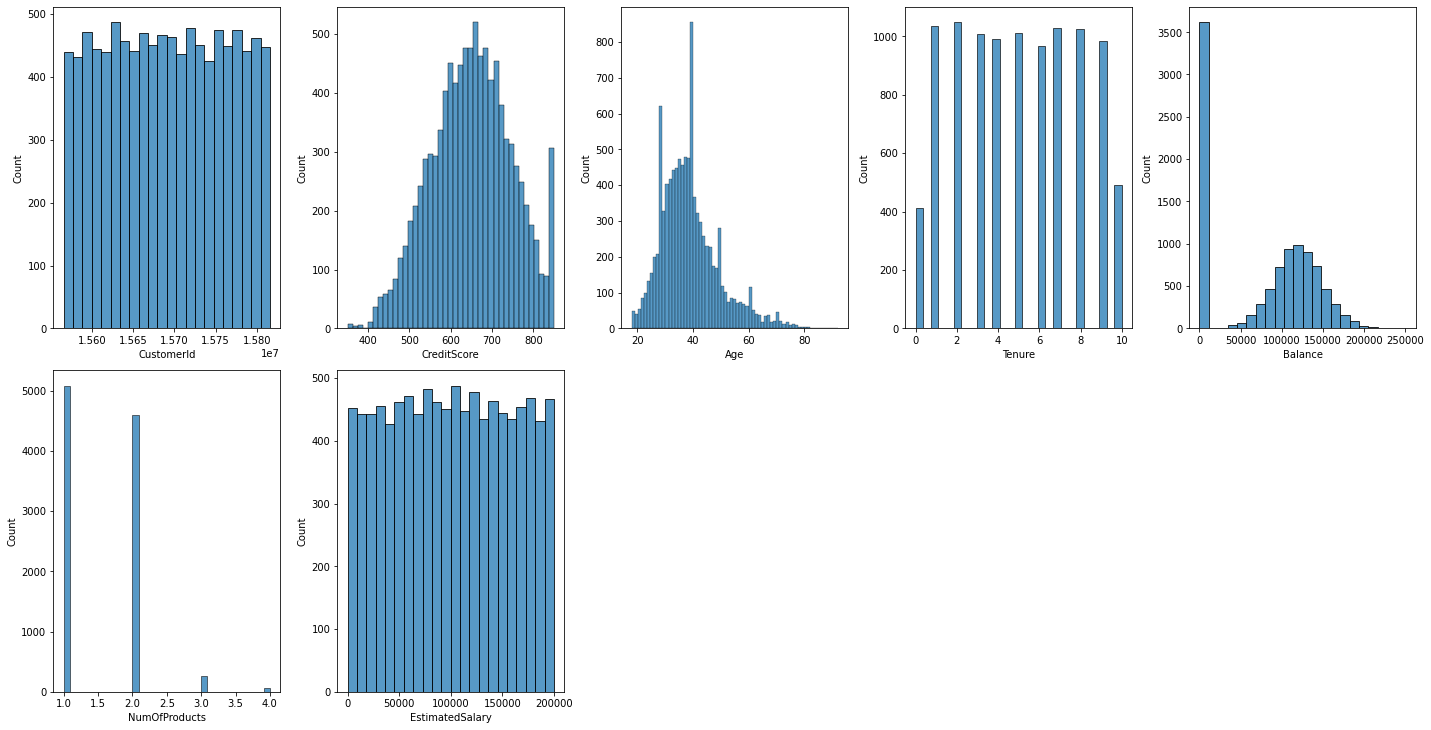

In [ ]:
cols = 5
rows = 6
num_cols = df.select_dtypes(exclude='object').columns #excluding dtypes object

fig = plt.figure( figsize=(cols*4, rows*5))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(rows,cols,i+1)
    
    sns.histplot(x = df[col], ax = ax)
    
fig.tight_layout()  
plt.show()

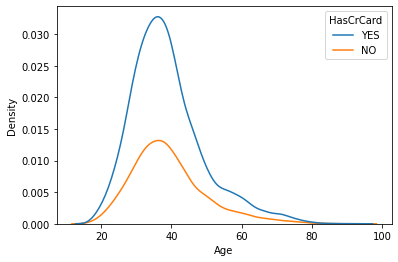

In [ ]:
sns.kdeplot(x='Age', data=df, hue='HasCrCard')

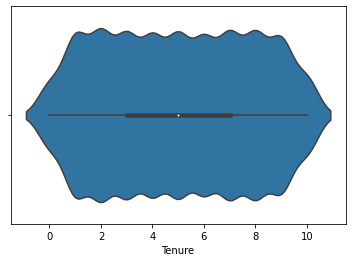

In [ ]:
sns.violinplot(x=df["Tenure"])

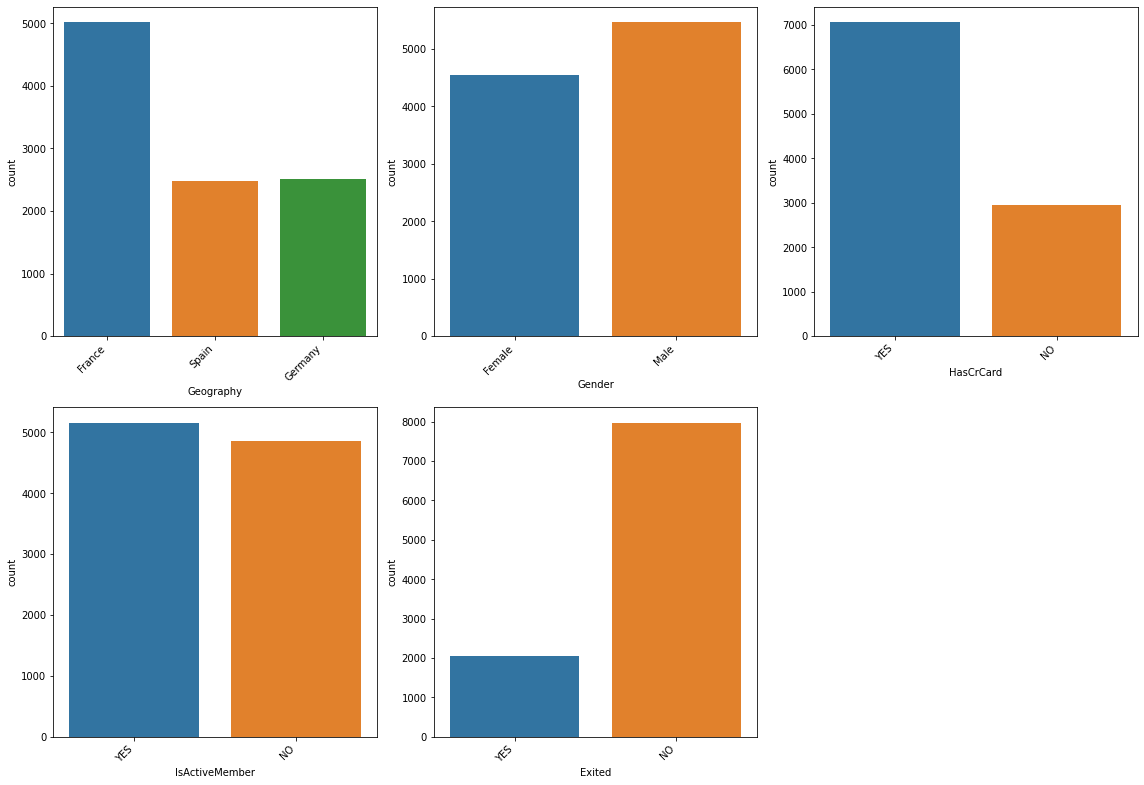

In [ ]:
cols = 3
rows = 3
fig = plt.figure(figsize= (16,16))
all_categs = df.select_dtypes(include='object')
cat_cols = all_categs.columns[all_categs.nunique() < 10]
for i, col in enumerate(cat_cols):
    
    ax=fig.add_subplot(rows, cols, i+1)
    
    sns.countplot(x=df[col], ax=ax)
    
    plt.xticks(rotation=45, ha='right')
    
fig.tight_layout()  
plt.show()

### Bivariate

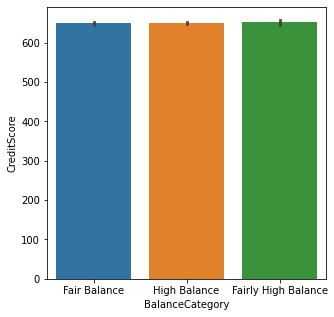

In [ ]:
plt.figure(figsize=(5,5))
sns.barplot(x='BalanceCategory',y='CreditScore',data=df) #barplot between Balance and CreditScore
plt.show()

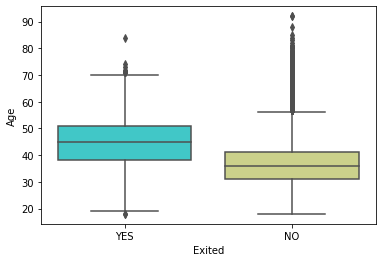

In [ ]:
sns.boxplot(x='Exited',y='Age',data=df, palette='rainbow')

In [ ]:
dfm = df[df['Gender']=='Male']
dff = df[df['Gender']=='Female']

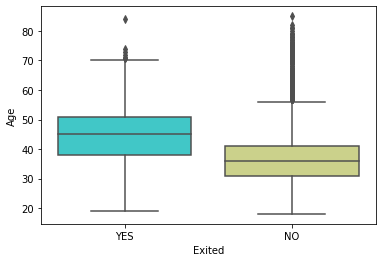

In [ ]:
sns.boxplot(x='Exited',y='Age',data=dff, palette='rainbow')

In [ ]:
def balGroup(bal):
  if bal<=50000:
    return "Fair Balance"
  elif bal>50000 and bal<=150000:
    return "High Balance"
  else:
    return "Fairly High Balance"
  
df['BalanceCategory'] = df['Balance'].apply(balGroup)

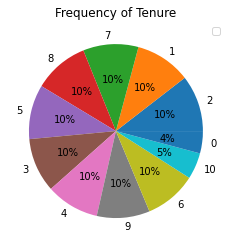

In [ ]:
data1 = df['Tenure'].value_counts()
plt.title('Frequency of Tenure')
plt.legend()
plt.pie(data1, labels=data1.index, autopct="%.0f%%");
plt.show()